In [3]:
import pandas as pd
import numpy as np

In [4]:
RAW_DATA = r"C:\Users\ASUS\OneDrive\Semester 3\Innovation Project\Assign_02\flights_data.csv"

In [5]:
raw_data = pd.read_csv(RAW_DATA)

In [6]:
raw_data.head()

,Departing_Port,Arriving_Port,Month,Year,Average_Fare,Distance,MinTemp,MaxTemp,Rainfall,Evaporation,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Airline,Departure_Delays_%,Arrival_Delays_%,Cancellations_%
0,Adelaide,Melbourne,1,2010,414.0,641.652927,17.33103,29.76354,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.01693,22.526185,27.847663,Jetstar,0.255319,0.234043,0.000000
1,Adelaide,Melbourne,1,2010,414.0,641.652927,17.33103,29.76354,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.01693,22.526185,27.847663,Qantas,0.087542,0.090909,0.003367
2,Adelaide,Melbourne,1,2010,414.0,641.652927,17.33103,29.76354,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.01693,22.526185,27.847663,Tigerair Australia,0.083333,0.033333,0.050000
3,Adelaide,Melbourne,1,2010,414.0,641.652927,17.33103,29.76354,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.01693,22.526185,27.847663,Virgin Australia,0.072874,0.068826,0.012146
4,Adelaide,Canberra,1,2010,414.0,970.229046,17.33103,29.76354,2.198292,8.894267,...,1013.053858,1010.905502,4.167756,4.01693,22.526185,27.847663,Qantas,0.111111,0.083333,0.000000


In [7]:
raw_data["Average_Delay_%"] = (raw_data["Arrival_Delays_%"] + raw_data["Departure_Delays_%"]) * 0.5

In [8]:
processed_data = raw_data.copy()

processed_data = processed_data.sort_values(["Year", "Month", "Departing_Port", "Arriving_Port", "Airline"])

In [9]:
categorical_variables = ["Departing_Port", "Arriving_Port", "Airline"]

for variable in categorical_variables:
    one_hot_airline_categories = pd.get_dummies(processed_data[variable])

    del processed_data[variable]

    processed_data = pd.concat([processed_data, one_hot_airline_categories], axis=1)

print(processed_data.head())

    Month  Year  Average_Fare     Distance   MinTemp   MaxTemp  Rainfall  \
11      1  2010         414.0  1316.720677  17.33103  29.76354  2.198292   
12      1  2010         414.0  1316.720677  17.33103  29.76354  2.198292   
16      1  2010         414.0  1619.982414  17.33103  29.76354  2.198292   
17      1  2010         414.0  1619.982414  17.33103  29.76354  2.198292   
18      1  2010         414.0  1619.982414  17.33103  29.76354  2.198292   

    Evaporation  Sunshine  WindGustSpeed  ...  Wagga Wagga  Jetstar  Qantas  \
11     8.894267  9.385116      43.838095  ...            0        0       1   
12     8.894267  9.385116      43.838095  ...            0        0       0   
16     8.894267  9.385116      43.838095  ...            0        1       0   
17     8.894267  9.385116      43.838095  ...            0        0       1   
18     8.894267  9.385116      43.838095  ...            0        0       0   

    QantasLink  Regional Express  Skywest  Tigerair Australia  \
11 

# Normalizingm

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

continuous_features = processed_data.select_dtypes("float").columns.values

processed_data[continuous_features] = scaler.fit_transform(processed_data[continuous_features])
processed_data

,Month,Year,Average_Fare,Distance,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,...,Wagga Wagga,Jetstar,Qantas,QantasLink,Regional Express,Skywest,Tigerair Australia,Virgin Australia,Virgin Australia - ATR/F100 Operations,Virgin Australia Regional Airlines
11,1,2010,0.010518,0.320498,0.928133,0.966634,0.364930,0.898459,0.931945,0.823711,...,0,0,1,0,0,0,0,0,0,0
12,1,2010,0.010518,0.320498,0.928133,0.966634,0.364930,0.898459,0.931945,0.823711,...,0,0,0,0,0,0,1,0,0,0
16,1,2010,0.010518,0.410449,0.928133,0.966634,0.364930,0.898459,0.931945,0.823711,...,0,1,0,0,0,0,0,0,0,0
17,1,2010,0.010518,0.410449,0.928133,0.966634,0.364930,0.898459,0.931945,0.823711,...,0,0,1,0,0,0,0,0,0,0
18,1,2010,0.010518,0.410449,0.928133,0.966634,0.364930,0.898459,0.931945,0.823711,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30093,6,2017,0.532011,0.014184,0.066673,0.138983,0.298577,0.070292,0.219417,0.000000,...,0,0,0,0,1,0,0,0,0,0
30094,6,2017,0.535974,0.431553,0.066673,0.138983,0.298577,0.070292,0.219417,0.000000,...,0,1,0,0,0,0,0,0,0,0
30095,6,2017,0.535974,0.431553,0.066673,0.138983,0.298577,0.070292,0.219417,0.000000,...,0,0,0,0,0,0,0,1,0,0
30096,6,2017,0.667801,0.038456,0.066673,0.138983,0.298577,0.070292,0.219417,0.000000,...,0,0,0,1,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

X_columns = \
    ['Distance',
     'MinTemp',
     'MaxTemp',
     'Rainfall',
     'Evaporation',
     'Sunshine',
     'WindGustSpeed',
     'WindSpeed9am',
     'WindSpeed3pm',
     'Humidity9am',
     'Humidity3pm',
     'Pressure9am',
     'Pressure3pm',
     'Cloud9am',
     'Cloud3pm',
     'Temp9am',
     'Temp3pm',
     'Cancellations_%',
     'Adelaide',
     'Albury',
     'Alice Springs',
     'Armidale',
     'Ayers Rock',
     'Ballina',
     'Brisbane',
     'Broome',
     'Bundaberg',
     'Cairns',
     'Canberra',
     'Coffs Harbour',
     'Darwin',
     'Dubbo',
     'Emerald',
     'Geraldton',
     'Gladstone',
     'Gold Coast',
     'Hamilton Island',
     'Hobart',
     'Kalgoorlie',
     'Karratha',
     'Launceston',
     'Mackay',
     'Melbourne',
     'Mildura',
     'Moranbah',
     'Mount Isa',
     'Newcastle',
     'Newman',
     'Perth',
     'Port Hedland',
     'Port Lincoln',
     'Port Macquarie',
     'Proserpine',
     'Rockhampton',
     'Sunshine Coast',
     'Sydney',
     'Tamworth',
     'Townsville',
     'Wagga Wagga',
     'Adelaide',
     'Albury',
     'Alice Springs',
     'Armidale',
     'Ayers Rock',
     'Ballina',
     'Brisbane',
     'Broome',
     'Bundaberg',
     'Cairns',
     'Canberra',
     'Coffs Harbour',
     'Darwin',
     'Dubbo',
     'Emerald',
     'Geraldton',
     'Gladstone',
     'Gold Coast',
     'Hamilton Island',
     'Hobart',
     'Kalgoorlie',
     'Karratha',
     'Launceston',
     'Mackay',
     'Melbourne',
     'Mildura',
     'Moranbah',
     'Mount Isa',
     'Newcastle',
     'Newman',
     'Perth',
     'Port Hedland',
     'Port Lincoln',
     'Port Macquarie',
     'Proserpine',
     'Rockhampton',
     'Sunshine Coast',
     'Sydney',
     'Tamworth',
     'Townsville',
     'Wagga Wagga',
     'Jetstar',
     'Qantas',
     'QantasLink',
     'Regional Express',
     'Skywest',
     'Tigerair Australia',
     'Virgin Australia',
     'Virgin Australia - ATR/F100 Operations',
     'Virgin Australia Regional Airlines']

Y_columns = ["Average_Delay_%"]

In [12]:
X = processed_data[X_columns]
y = processed_data[Y_columns].to_numpy().flatten()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the GradientBoostingRegressor
regressor = GradientBoostingRegressor(random_state=1)

regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

In [14]:
y_pred

array([0.24281424, 0.16033654, 0.14336268, ..., 0.24219261, 0.32548878,
       0.2259508 ])

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.008144595663752523
R-squared: 0.3179152318980559


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Starting cross-validation...")

r2_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Cross-validation complete.")
print("Cross-validated R² scores:", r2_scores)
print("Mean R²:", r2_scores.mean())
print(f"Mean squared error: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")

Starting cross-validation...
Cross-validation complete.
Cross-validated R² scores: [ 0.03546606 -0.02022517  0.17278327  0.06145115  0.2266452 ]
Mean R²: 0.09522410241735821
Mean squared error: 0.01
Mean absolute error: 0.07


In [17]:
#import pickle

#model_save_path = "../trained_models/gradient_boosting_delays.pkl"


#pickle.dump(regressor, open(model_save_path, 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: '../trained_models/gradient_boosting_delays.pkl'

In [ ]:
import os

os.getcwd()

In [ ]:
#regressor = pickle.load(open(model_save_path, 'rb'))

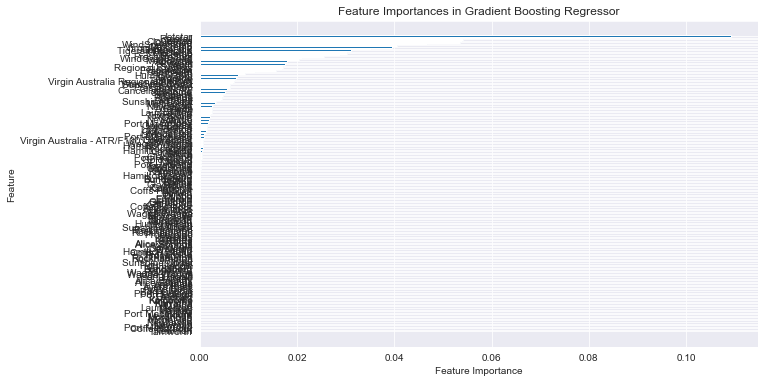

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the model
importance = regressor.feature_importances_

# Sort the feature importances
indices = np.argsort(importance)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance[indices])
plt.yticks(range(len(importance)), [x_train.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Gradient Boosting Regressor")
plt.show()


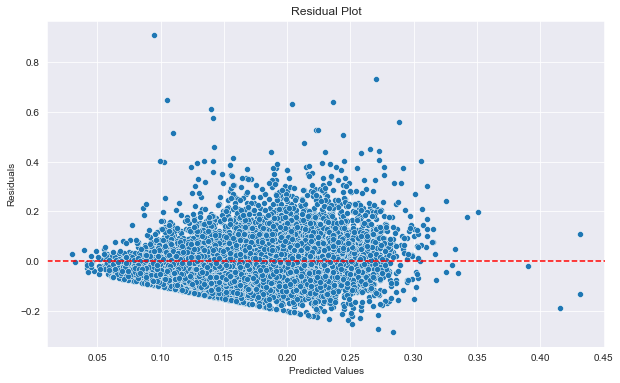

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
